In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf

import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/arwenorford/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [3]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello TensorFlow'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120]
The original string: "Hello TensorFlow"


In [7]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
    print ('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow


In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [10]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(1e-4),
             metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=10,
                   validation_data=test_dataset,
                   validation_steps=30)

Epoch 1/10
391/391 [==============================] - 803s 2s/step - loss: 0.6171 - accuracy: 0.6378 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 688s 2s/step - loss: 0.3518 - accuracy: 0.8610 - val_loss: 0.3295 - val_accuracy: 0.8651
Epoch 3/10
391/391 [==============================] - 681s 2s/step - loss: 0.2603 - accuracy: 0.9031 - val_loss: 0.3546 - val_accuracy: 0.8589
Epoch 4/10
391/391 [==============================] - 672s 2s/step - loss: 0.2188 - accuracy: 0.9210 - val_loss: 0.3084 - val_accuracy: 0.8724
Epoch 5/10
391/391 [==============================] - 669s 2s/step - loss: 0.1958 - accuracy: 0.9328 - val_loss: 0.3470 - val_accuracy: 0.8604
Epoch 6/10
391/391 [==============================] - 752s 2s/step - loss: 0.1723 - accuracy: 0.9411 - val_loss: 0.4250 - val_accuracy: 0.8589
Epoch 7/10
391/391 [==============================] - 837s 2s/step - loss: 0.1527 - accuracy: 0.9492 - val_loss: 0.3866 - val_accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


391/391 [==============================] - 160s 409ms/step - loss: 0.5174 - accuracy: 0.8560
Test Loss: 0.5173708038104464
Test Accuracy: 0.8560000061988831


In [16]:
def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec

In [17]:
def sample_predict(sentence, pad):
    encoded_sample_pred_text = encoder.encode(sample_pred_text)
    
    if pad:
        encoded_sample_text = pad_to_size(encoded_sample_pred_text, 64)
    encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
    predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
    
    return (predictions)

In [18]:
sample_pred_text = ('What a pile of stool, I hated it, it was a slap happy '
                    'I really did not like it at all.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.26495147]]


In [19]:
sample_pred_text = ('What a pile of stool, I hated it, it was a slap happy '
                   'I really did not like it at all.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.19944005]]


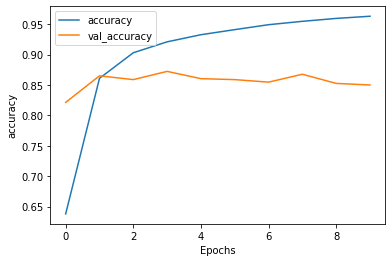

In [20]:
plot_graphs(history, 'accuracy')

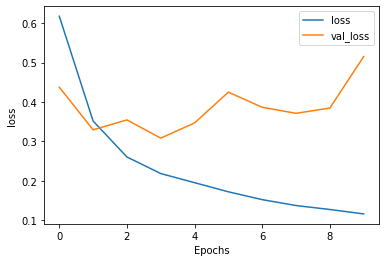

In [21]:
plot_graphs(history, 'loss')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.save('psyocketologistv3.h5')

In [24]:
sample_pred_text = ("I can't be bothered with the fucken thing")
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.34096184]]


In [25]:
sample_pred_text = ("I fucking love it, I want to have sex with it")
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.7452403]]


In [40]:
sample_pred_text = ('I have a fucking serious problem. I have been cutting myself up and feel all fucked up. I feel bad about it all.')
predictions = sample_predict(sample_pred_text, pad=True)
if predictions >= 0.9:
    print('I can sense you are feeling really amazing! Tell me more about this for you.')
elif predictions >= 0.75:
    print('So things are going really well then? Would you describe yourself as happy?')
elif predictions >= 0.5:
    print('I sense that you are going fairly well for now? Is that right?')
elif predictions >= 0.25:
    print('Would it be fair to say that things have been better for you?')
else:
    print('I can sense that possibly you are not in a good head space. Do you want to talk about it, or do you think I could refer you to someone?')
print (predictions)

Would it be fair to say that things have been better for you?
[[0.36111912]]
